# Predict the price of an Airbnb listing

In [62]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor

In [6]:
# Load the data
# https://www.kaggle.com/c/dphi-amsterdam-airbnb-data/data
airbnb_lst_data = pd.read_csv('Airbnb_Listing_Train.csv')
airbnb_lst_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,11602914,Luxury home 100m2+garden in center!,3123809,Marjolein,NaN,De Pijp - Rivierenbuurt,52.35368,4.90177,Entire home/apt,3,13,15-02-2020,0.27,1,0,220
1,13289321,East is where your home is!,10259430,Ana,NaN,Oud-Oost,52.35728,4.92052,Entire home/apt,4,14,19-06-2019,0.29,1,0,110
2,40779315,Amsterdam Central - LUXURY house in BUSY STREET,224969266,Mark,NaN,Centrum-West,52.37582,4.89850,Entire home/apt,2,9,16-03-2020,1.65,1,7,100
3,7820311,great appartment down town,693472,Ayden,NaN,Westerpark,52.37792,4.87300,Entire home/apt,3,42,17-02-2020,0.72,1,0,130
4,27346603,Private room with canal view in peaceful area,41888346,Alissa,NaN,Westerpark,52.38051,4.87493,Private room,2,89,26-02-2020,4.02,1,24,90


In [8]:
airbnb_lst_data.shape

(12901, 16)

In [10]:
airbnb_lst_data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price'],
      dtype='object')

# Data Cleaning, Data Wrangling, Data Preprocessing

In [13]:
airbnb_lst_data.isnull().sum()

id                                    0
name                                 22
host_id                               0
host_name                             8
neighbourhood_group               12901
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
minimum_nights                        0
number_of_reviews                     0
last_review                        1596
reviews_per_month                  1596
calculated_host_listings_count        0
availability_365                      0
price                                 0
dtype: int64

In [15]:
airbnb_lst_data.isnull().sum()/len(airbnb_lst_data)*100

id                                  0.000000
name                                0.170529
host_id                             0.000000
host_name                           0.062011
neighbourhood_group               100.000000
neighbourhood                       0.000000
latitude                            0.000000
longitude                           0.000000
room_type                           0.000000
minimum_nights                      0.000000
number_of_reviews                   0.000000
last_review                        12.371134
reviews_per_month                  12.371134
calculated_host_listings_count      0.000000
availability_365                    0.000000
price                               0.000000
dtype: float64

In [17]:
airbnb_lst_data = airbnb_lst_data.drop('neighbourhood_group',axis=1)
airbnb_lst_data.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,11602914,Luxury home 100m2+garden in center!,3123809,Marjolein,De Pijp - Rivierenbuurt,52.35368,4.90177,Entire home/apt,3,13,15-02-2020,0.27,1,0,220
1,13289321,East is where your home is!,10259430,Ana,Oud-Oost,52.35728,4.92052,Entire home/apt,4,14,19-06-2019,0.29,1,0,110
2,40779315,Amsterdam Central - LUXURY house in BUSY STREET,224969266,Mark,Centrum-West,52.37582,4.89850,Entire home/apt,2,9,16-03-2020,1.65,1,7,100
3,7820311,great appartment down town,693472,Ayden,Westerpark,52.37792,4.87300,Entire home/apt,3,42,17-02-2020,0.72,1,0,130
4,27346603,Private room with canal view in peaceful area,41888346,Alissa,Westerpark,52.38051,4.87493,Private room,2,89,26-02-2020,4.02,1,24,90


In [19]:
airbnb_lst_data = airbnb_lst_data.drop(['last_review'],axis=1)
airbnb_lst_data.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,11602914,Luxury home 100m2+garden in center!,3123809,Marjolein,De Pijp - Rivierenbuurt,52.35368,4.90177,Entire home/apt,3,13,0.27,1,0,220
1,13289321,East is where your home is!,10259430,Ana,Oud-Oost,52.35728,4.92052,Entire home/apt,4,14,0.29,1,0,110
2,40779315,Amsterdam Central - LUXURY house in BUSY STREET,224969266,Mark,Centrum-West,52.37582,4.89850,Entire home/apt,2,9,1.65,1,7,100
3,7820311,great appartment down town,693472,Ayden,Westerpark,52.37792,4.87300,Entire home/apt,3,42,0.72,1,0,130
4,27346603,Private room with canal view in peaceful area,41888346,Alissa,Westerpark,52.38051,4.87493,Private room,2,89,4.02,1,24,90


In [21]:
airbnb_lst_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12901 entries, 0 to 12900
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              12901 non-null  int64  
 1   name                            12879 non-null  object 
 2   host_id                         12901 non-null  int64  
 3   host_name                       12893 non-null  object 
 4   neighbourhood                   12901 non-null  object 
 5   latitude                        12901 non-null  float64
 6   longitude                       12901 non-null  float64
 7   room_type                       12901 non-null  object 
 8   minimum_nights                  12901 non-null  int64  
 9   number_of_reviews               12901 non-null  int64  
 10  reviews_per_month               11305 non-null  float64
 11  calculated_host_listings_count  12901 non-null  int64  
 12  availability_365                

In [23]:
airbnb_lst_data = airbnb_lst_data.drop(['id','name','host_id','host_name'],axis=1)
airbnb_lst_data.head()

,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,De Pijp - Rivierenbuurt,52.35368,4.90177,Entire home/apt,3,13,0.27,1,0,220
1,Oud-Oost,52.35728,4.92052,Entire home/apt,4,14,0.29,1,0,110
2,Centrum-West,52.37582,4.89850,Entire home/apt,2,9,1.65,1,7,100
3,Westerpark,52.37792,4.87300,Entire home/apt,3,42,0.72,1,0,130
4,Westerpark,52.38051,4.87493,Private room,2,89,4.02,1,24,90


In [25]:
airbnb_lst_data['neighbourhood'].value_counts()

De Baarsjes - Oud-West                    2209
De Pijp - Rivierenbuurt                   1600
Centrum-West                              1429
Centrum-Oost                              1097
Westerpark                                 958
Zuid                                       924
Oud-Oost                                   831
Bos en Lommer                              730
Oostelijk Havengebied - Indische Buurt     644
Watergraafsmeer                            381
Oud-Noord                                  376
IJburg - Zeeburgereiland                   321
Slotervaart                                269
Noord-West                                 257
Noord-Oost                                 171
Buitenveldert - Zuidas                     155
Geuzenveld - Slotermeer                    144
De Aker - Nieuw Sloten                      88
Osdorp                                      83
Gaasperdam - Driemond                       80
Bijlmer-Centrum                             78
Bijlmer-Oost 

In [27]:
airbnb_lst_data['room_type'].value_counts()

Entire home/apt    10064
Private room        2622
Hotel room           174
Shared room           41
Name: room_type, dtype: int64

In [29]:
airbnb_lst_data['reviews_per_month'] = airbnb_lst_data['reviews_per_month'].fillna(airbnb_lst_data['reviews_per_month'].median())
airbnb_lst_data.isnull().sum()

neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price                             0
dtype: int64

## Data Visualization

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

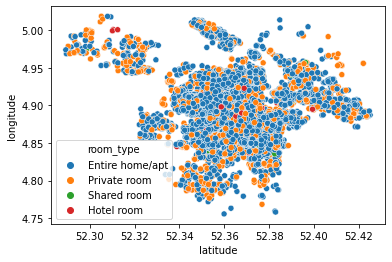

In [32]:
sns.scatterplot(x=airbnb_lst_data['latitude'],y=airbnb_lst_data['longitude'],hue=airbnb_lst_data['room_type'])

<AxesSubplot:xlabel='room_type', ylabel='count'>

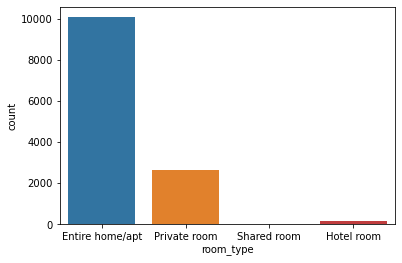

In [34]:
sns.countplot(x=airbnb_lst_data['room_type'])

<AxesSubplot:>

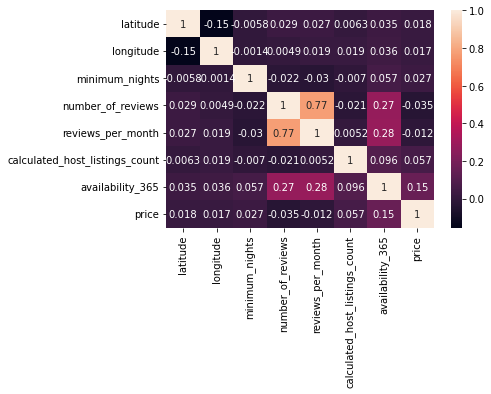

In [36]:
sns.heatmap(airbnb_lst_data.corr(),annot=True)

<AxesSubplot:ylabel='Density'>

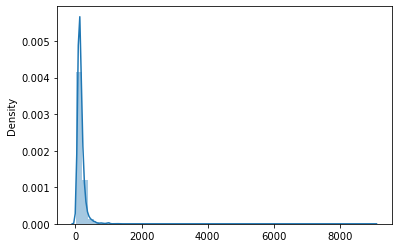

In [38]:
sns.distplot(x=airbnb_lst_data['price'])

<AxesSubplot:xlabel='room_type', ylabel='price'>

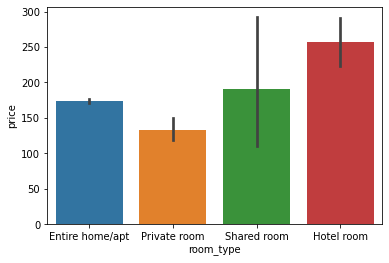

In [40]:
sns.barplot(x=airbnb_lst_data['room_type'],y=airbnb_lst_data['price'])

<AxesSubplot:xlabel='room_type', ylabel='price'>

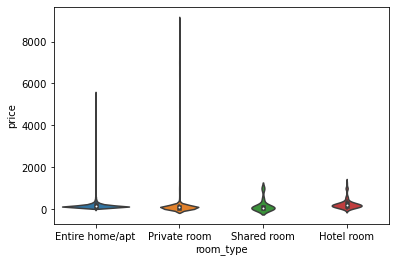

In [42]:
sns.violinplot(x=airbnb_lst_data['room_type'],y=airbnb_lst_data['price'])

## Feature scaling

In [45]:
ss = StandardScaler()
ss

StandardScaler()

In [49]:
airbnb_lst_data[['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month', 
                 'calculated_host_listings_count','availability_365']] = ss.fit_transform(airbnb_lst_data[['latitude', 'longitude','minimum_nights','number_of_reviews','reviews_per_month',
                                                                                                           'calculated_host_listings_count','availability_365']])
airbnb_lst_data.head()

,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,De Pijp - Rivierenbuurt,-0.708567,0.333919,Entire home/apt,-0.035801,-0.221017,-0.364897,-0.189366,-0.568531,220
1,Oud-Oost,-0.489290,0.854540,Entire home/apt,0.030190,-0.202292,-0.348039,-0.189366,-0.568531,110
2,Centrum-West,0.639988,0.243123,Entire home/apt,-0.101793,-0.295917,0.798287,-0.189366,-0.503706,100
3,Westerpark,0.767900,-0.464922,Entire home/apt,-0.035801,0.322013,0.014402,-0.189366,-0.568531,130
4,Westerpark,0.925657,-0.411332,Private room,-0.101793,1.202096,2.795930,-0.189366,-0.346276,90


## Feature encoding

In [51]:
data_ohe = pd.get_dummies(airbnb_lst_data[['neighbourhood','room_type']])
data_ohe.head()

,neighbourhood_Bijlmer-Centrum,neighbourhood_Bijlmer-Oost,neighbourhood_Bos en Lommer,neighbourhood_Buitenveldert - Zuidas,neighbourhood_Centrum-Oost,neighbourhood_Centrum-West,neighbourhood_De Aker - Nieuw Sloten,neighbourhood_De Baarsjes - Oud-West,neighbourhood_De Pijp - Rivierenbuurt,neighbourhood_Gaasperdam - Driemond,...,neighbourhood_Oud-Noord,neighbourhood_Oud-Oost,neighbourhood_Slotervaart,neighbourhood_Watergraafsmeer,neighbourhood_Westerpark,neighbourhood_Zuid,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [53]:
airbnb_lst_data = pd.concat([airbnb_lst_data,data_ohe],axis=1)
airbnb_lst_data = airbnb_lst_data.drop(['neighbourhood','room_type'],axis=1)
airbnb_lst_data.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price,neighbourhood_Bijlmer-Centrum,neighbourhood_Bijlmer-Oost,...,neighbourhood_Oud-Noord,neighbourhood_Oud-Oost,neighbourhood_Slotervaart,neighbourhood_Watergraafsmeer,neighbourhood_Westerpark,neighbourhood_Zuid,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,-0.708567,0.333919,-0.035801,-0.221017,-0.364897,-0.189366,-0.568531,220,0,0,...,0,0,0,0,0,0,1,0,0,0
1,-0.489290,0.854540,0.030190,-0.202292,-0.348039,-0.189366,-0.568531,110,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0.639988,0.243123,-0.101793,-0.295917,0.798287,-0.189366,-0.503706,100,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.767900,-0.464922,-0.035801,0.322013,0.014402,-0.189366,-0.568531,130,0,0,...,0,0,0,0,1,0,1,0,0,0
4,0.925657,-0.411332,-0.101793,1.202096,2.795930,-0.189366,-0.346276,90,0,0,...,0,0,0,0,1,0,0,0,1,0


# separate x and y

In [64]:
x = airbnb_lst_data.drop('price',axis=1)
y = airbnb_lst_data['price']

# split the data

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 0)

# Apply linearregression on the train dataset

In [70]:
lr = LinearRegression()
lr

LinearRegression()

In [72]:
lr.fit(x_train,y_train)

LinearRegression()

# Perform prediction on the test dataset

In [75]:
y_pred = lr.predict(x_test)
y_pred

array([233.69826275, 226.88622677, 125.03669364, ..., 160.25781456,
        54.01590238, 161.77453579])

# Evaluation

In [78]:
r2_score(y_test,y_pred)

0.03522402412790038

## Using KNeighborsRegressor

In [81]:
knr = KNeighborsRegressor()
knr

KNeighborsRegressor()

In [83]:
knr.fit(x_train,y_train)

KNeighborsRegressor()

In [90]:
y_pred_knr = knr.predict(x_test)
y_pred_knr

array([170. , 148.8, 115. , ..., 320. ,  76.2, 199.8])

In [91]:
r2_score(y_test,y_pred_knr)

0.2318172233622111

- KNeighborsRegressor is better than LinearRegression for the above data.